#TODO
1. sprawdzić zbalansowanie datasetów; poprawić w razie konieczności
2. klasyfikacja; wybrać klasyfikatory i puścić na datasetach
3. syntetyczny zbiór danych???

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from utilities import one_hot
from L1PCA import l1pca

from sklearn.decomposition import PCA, SparsePCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import accuracy_score

from utilities import one_hot

In [39]:
def getLabels(path):
    return np.genfromtxt(path, delimiter=",")[1:, -1]
    
def standardize_dataset(path):
    data = pd.read_csv(path)
    features = list(data.columns[:-1])
    x = data.loc[:, features].values
    x = StandardScaler().fit_transform(x)
    return x


In [40]:
def l1pca_transform(path, n):
    data = pd.read_csv(path)
    features = list(data.columns[:-1])
    x = data.loc[:, features].values
    principal_components = l1pca(x, n)
    return principal_components

def pca_transform(path, n):
    n = int(n)
    standardized_data = standardize_dataset(path)
    pca = PCA(n_components=n)
    principal_components = pca.fit_transform(standardized_data)
    #print(f'EXPLAINED VARIANCE RATIO:\t{np.around(pca.explained_variance_ratio_, decimals=3)}')
    #print(f'INFORMATION LOSS:\t\t{1-sum(pca.explained_variance_ratio_):.3}')
    return principal_components

def kernel_pca_transform(path, n):
    standardized_data = standardize_dataset(path)
    kernel_pca = KernelPCA(n_components=n)
    principal_components = kernel_pca.fit_transform(standardized_data)
    return principal_components

def sparse_pca_transform(path, n):
    standardized_data = standardize_dataset(path)
    sparse_pca = SparsePCA(n_components=n)
    principal_components = sparse_pca.fit_transform(standardized_data)
    return principal_components

def lda_transform(path, n):
    data = pd.read_csv(path)
    labels = data['label'].to_numpy()
    standardized_data = standardize_dataset(path)
    lda = LinearDiscriminantAnalysis(n_components=n) # in case of emergencies: solver='eigen'
    principal_components = lda.fit(standardized_data, labels).transform(standardized_data)
    return principal_components

In [41]:
SYNTHETIC_PATH1 = "../data/synthetic1.csv"
SYNTHETIC_PATH2 = "../data/synthetic2.csv"
SYNTHETIC_PATH3 = "../data/synthetic3.csv"

BREAST_PATH = '../data/breast.csv'
HR_PATH = '../data/human_resources.csv'
SONAR_PATH = '../data/sonar.csv'
SPAM_PATH = '../data/spam.csv'
POPFAILURES_PATH = '../data/popfailures.csv'
WINE_PATH = '../data/wine.csv'
DIGIT_PATH = '../data/digit.csv'
BREASTTISSUE_PATH = '../data/breasttissue.csv'

dataset_paths =  [BREASTTISSUE_PATH, BREAST_PATH,SONAR_PATH, POPFAILURES_PATH, WINE_PATH]

methods = {
    'pca': pca_transform,
    'kernel_pca': kernel_pca_transform,
    'sparse_pca': sparse_pca_transform,
    'lda': lda_transform,
    'l1pca': l1pca_transform,
}

clfs = {
    'GNB': GaussianNB(),
    'SVM': SVC(),
    'kNN': KNeighborsClassifier(),
    'CART': DecisionTreeClassifier(random_state=1410),
}

In [351]:
def genSyntheticDataset(n_features, n_informative, n_redundant, n_repeated, n_classes, dataset_id=None):
    X, y = datasets.make_classification(
        n_samples=100,
        n_features=n_features,
        n_redundant=n_redundant,
        n_informative=n_informative,
        n_repeated=n_repeated,
        random_state=1410,
        n_classes=n_classes,
        n_clusters_per_class=1
    )
    dfX = pd.DataFrame(X, columns=[f'f{i}' for i in range(1,X.shape[1] + 1)])
    dfX = np.round(dfX, decimals= 5)
    dfY = pd.DataFrame(y, columns=['label'])

    df = pd.concat([dfX, dfY], axis = 1)
    df.to_csv('../data/synthetic'+str(dataset_id)+".csv", index = False)

# X = pca_transform(SYNTHETIC_PATH, 15)
# y = getLabels(SYNTHETIC_PATH)

In [352]:
"""
Most datasets
"""
def init_many(*datasets):
    for dataset_name in datasets:
        dataset = pd.read_csv(f'../raw_data/{dataset_name}.csv', header=None)
        dataset.columns = [f'f{i}' for i in range(1, dataset.shape[1] + 1)]
        dataset.columns = [*dataset.columns[:-1], 'label']
        dataset.to_csv(f'../data/{dataset_name}.csv', index=False)

"""
Spam base dataset
"""
def init_spam():
    dataset_name = "spam"
    spam_features = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','label']
    spam_dataset = pd.read_csv(f"../raw_data/{dataset_name}.csv", header=None)
    spam_dataset.columns=spam_features
    spam_dataset.to_csv(SPAM_PATH, index = False)

"""
Sonar dataset
"""
def init_sonar():
    dataset_name = "sonar"
    sonar_dataset = pd.read_csv(f"../raw_data/{dataset_name}.csv", names = range(0,61))
    sonar_dataset.rename(columns={60:'label'}, inplace=True)
    # sonar_dataset['label'].replace(0, 'R',inplace=True)
    # sonar_dataset['label'].replace(1, 'M',inplace=True)
    sonar_dataset.to_csv(SONAR_PATH, index = False)
    

"""
Human resources dataset
"""
def init_hr():
    dataset_name = "human_resources"
    hr_dataset = pd.read_csv(f"../raw_data/{dataset_name}.csv")
    hr_labels = hr_dataset.pop('left')
    hr_dataset.rename(columns={'sales':'department'}, inplace=True)
    hr_dataset = one_hot(hr_dataset, 'salary')
    hr_dataset = one_hot(hr_dataset, 'department')
    hr_dataset.insert(len(hr_dataset.columns), 'label', hr_labels)
    hr_dataset.to_csv(HR_PATH, index = False)
    
"""
Breast dataset
"""
def init_breast():
    breast_dataset = pd.DataFrame(pd.read_csv(f"../raw_data/breast.csv"))
    breast_labels = breast_dataset.pop('diagnosis')
    breast_dataset.drop(columns=(['id', 'Unnamed: 32']), inplace=True)
    breast_dataset.insert(len(breast_dataset.columns), 'label', breast_labels)
    breast_dataset['label'].replace('B', 0,inplace=True)
    breast_dataset['label'].replace('M', 1,inplace=True)
    breast_dataset.to_csv(BREAST_PATH, index = False)


In [353]:
args = ['breasttissue', 'popfailures', 'wine']
init_many(*args)
#init_hr()
init_breast()
#init_spam()
init_sonar()

In [354]:
# genSyntheticDataset(n_features=20, n_informative=2, n_redundant=2, n_repeated=2, n_classes=4, dataset_id=1)
# genSyntheticDataset(n_features=40, n_informative=5, n_redundant=10, n_repeated=5, n_classes=10, dataset_id=2)
# genSyntheticDataset(n_features=60, n_informative=10, n_redundant=20, n_repeated=10, n_classes=2, dataset_id=3)

5
pca --- --- --- ../data/breasttissue.csv
kernel_pca --- --- --- ../data/breasttissue.csv
sparse_pca --- --- --- ../data/breasttissue.csv
lda --- --- --- ../data/breasttissue.csv
df_dims: 2
l1pca --- --- --- ../data/breasttissue.csv
1
pca --- --- --- ../data/breast.csv
kernel_pca --- --- --- ../data/breast.csv
sparse_pca --- --- --- ../data/breast.csv
lda --- --- --- ../data/breast.csv
df_dims: 1
l1pca --- --- --- ../data/breast.csv
1
pca --- --- --- ../data/sonar.csv
kernel_pca --- --- --- ../data/sonar.csv
sparse_pca --- --- --- ../data/sonar.csv
lda --- --- --- ../data/sonar.csv
df_dims: 1
l1pca --- --- --- ../data/sonar.csv
1
pca --- --- --- ../data/popfailures.csv
kernel_pca --- --- --- ../data/popfailures.csv
sparse_pca --- --- --- ../data/popfailures.csv
lda --- --- --- ../data/popfailures.csv
df_dims: 1
l1pca --- --- --- ../data/popfailures.csv
2
pca --- --- --- ../data/wine.csv
kernel_pca --- --- --- ../data/wine.csv
sparse_pca --- --- --- ../data/wine.csv
lda --- --- --- ../

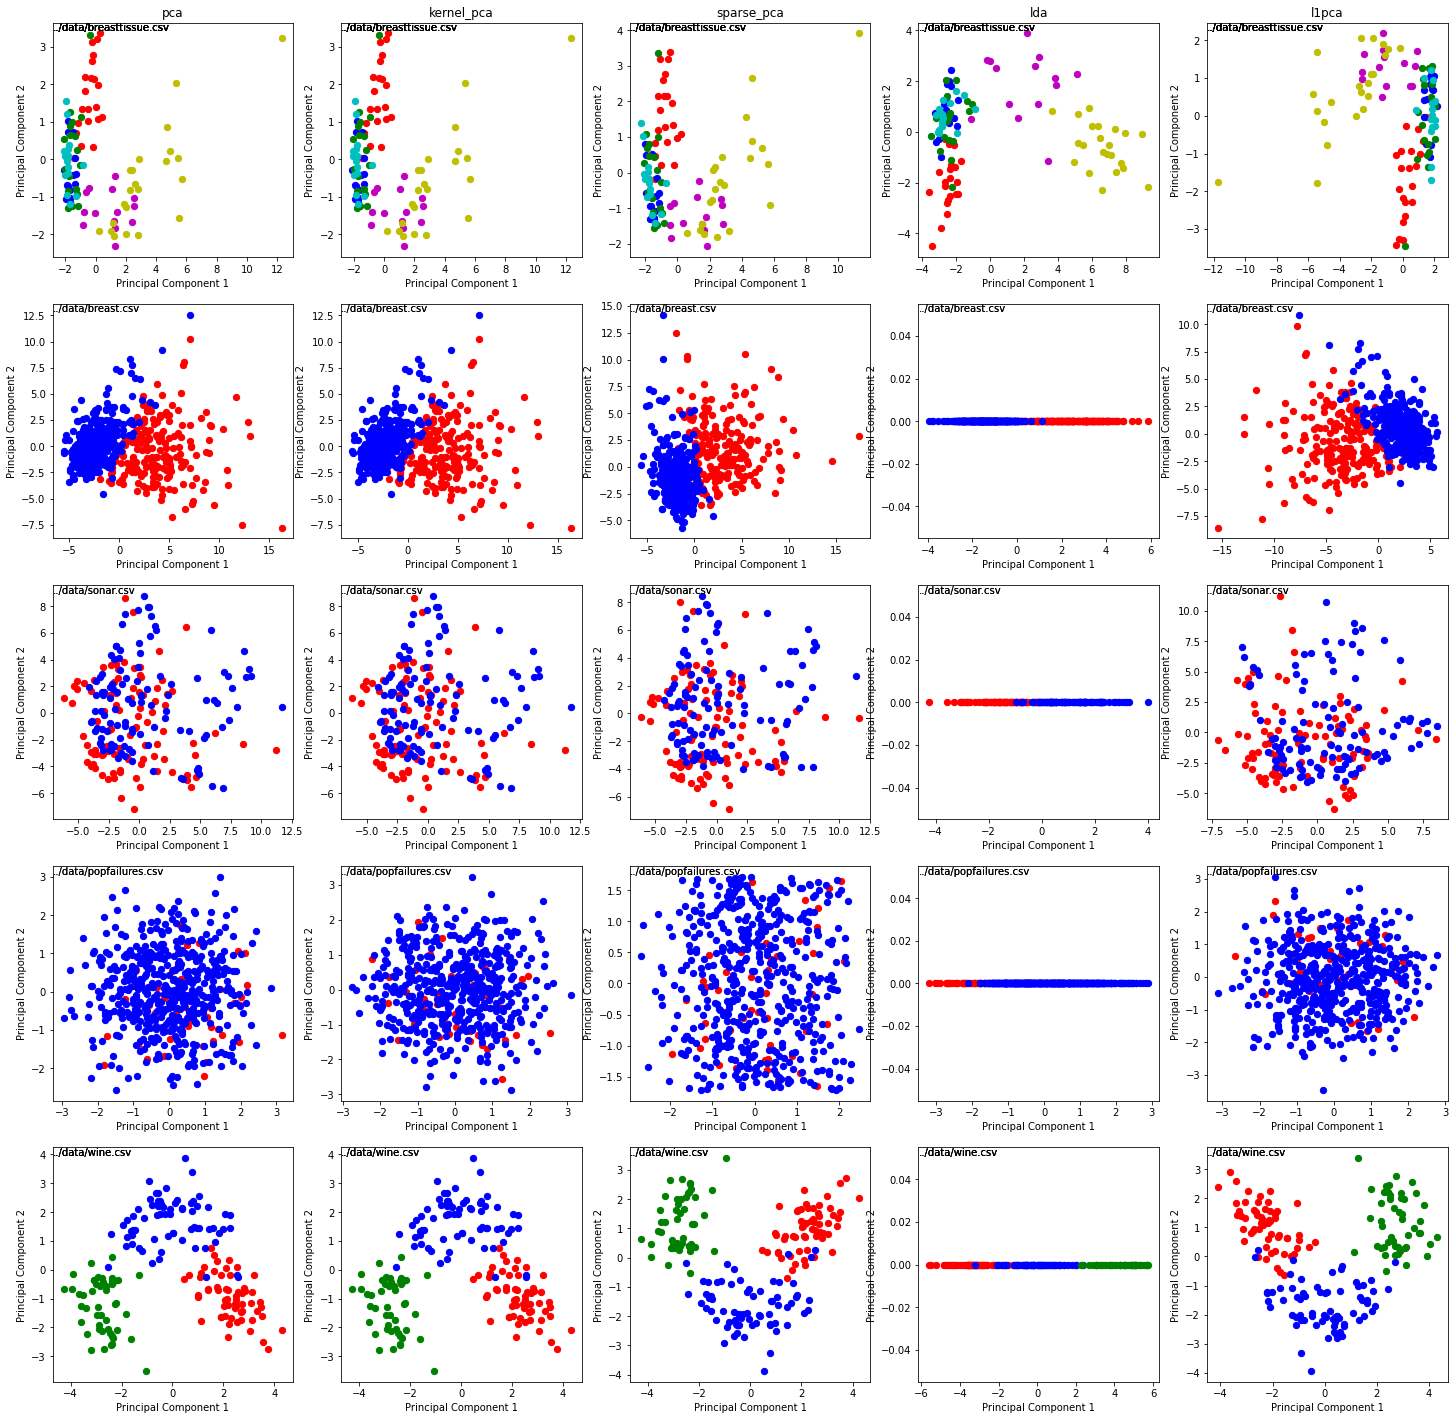

In [355]:
def draw_plots(dimensions):

    if(dimensions==3):
        subplot_kw = dict(projection='3d')
    else:
        subplot_kw = None
    
    fig, axs = plt.subplots(len(dataset_paths), len(methods), subplot_kw=subplot_kw, figsize=(25,25))

    for row, path in enumerate(dataset_paths):
        dataset = pd.read_csv(path)
        targets = dataset[dataset.columns[-1]].unique()
        colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'burlywood', 'chartreuse', 'crimson']

        lda_max_dims = min(len(dataset.columns)-1, len(targets) - 1)
        print(lda_max_dims)

        for column, method in enumerate(methods):
            if row == 0:
                axs[row,column].set_title(method)

            print(f"{method} --- --- --- {path}")

            if method == 'lda':
                df_dims = 2 if lda_max_dims > 2 else 1
                print("df_dims:", df_dims)
            else:
                df_dims = dimensions

            components = ([f'principal component {i+1}' for i in range(df_dims)])
			
            dataframe = pd.DataFrame(data = methods[method](path, df_dims), columns=components)
            
            for (target, color) in zip(targets,colors):

                plt.text(0, 1, path, ha='left', va='top', transform=axs[row, column].transAxes)

                indicesToKeep = pd.read_csv(path)[dataset.columns[-1]] == target
                x = dataframe.loc[indicesToKeep, 'principal component 1']
                if df_dims == 1:
                    axs[row, column].scatter(x = x, y = np.zeros_like(x), c = color, s = 40)
                else:
                    axs[row, column].scatter(x = x, y = dataframe.loc[indicesToKeep, 'principal component 2'], c = color, s = 40)
                # elif df_dims == 3:
                #     axs[row, column].scatter(xs = dataframe.loc[indicesToKeep, 'principal component 1'], ys = dataframe.loc[indicesToKeep, 'principal component 2'], zs = dataframe.loc[indicesToKeep, 'principal component 3'], c = color, s = 40)
    
    ax_args = {chr(ord('x')+i) + 'label' : 'Principal Component ' + str(i+1) for i in range(0, dimensions)}
    for ax in axs.flat:
        ax.set(**ax_args)

draw_plots(2)

In [356]:
n_datasets = len(dataset_paths)
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits)

scores = np.zeros((len(methods), n_datasets, n_splits))

In [357]:
def calculate_scores(dataset_paths, classifier, reduce_dimensions=True, f_ratio=None):
	folder_location = '../real_scores/'
	filename = f"raw_{classifier}" if not reduce_dimensions else f"{str(int(f_ratio*100))}_{classifier}"
	save_path = folder_location+filename

	for data_id, dataset in enumerate(dataset_paths):
		for method_id, method in enumerate(methods):
			data = pd.read_csv(dataset).to_numpy()
			#n_components cannot be larger than min(n_features, n_classes - 1).
			if reduce_dimensions:
				n_features = data.shape[1]
				n_classes = np.unique(data[:,-1]).size
				n_components = int(f_ratio*n_features)
				if method == 'lda' and n_components > min(n_features, n_classes-1):
					print(f'{dataset}; {f_ratio}: LDA reducing components to {min(n_features, n_classes - 1)} instead of {n_components} due to algorithm limitations' )
					n_components = min(n_features, n_classes - 1)
				if n_components < 1:
					n_components = 1
				X=methods[method](dataset, n_components)
				y=getLabels(dataset)
			else:
				X = data[:, :-1]
				y = data[:, -1].astype(int)
			for fold_id, (train, test) in enumerate(skf.split(X, y)):
				clf = clone(clfs[classifier])
				clf.fit(X[train], y[train])
				y_pred = clf.predict(X[test])
				scores[method_id, data_id, fold_id] = accuracy_score(y[test], y_pred)
				
	np.save(save_path, scores)

In [358]:
# original scores; no dimensionality reduction
for classifier in clfs:
    calculate_scores(dataset_paths=dataset_paths, classifier=classifier, reduce_dimensions=False)
    calculate_scores(dataset_paths=dataset_paths, classifier=classifier, f_ratio=0.25)
    calculate_scores(dataset_paths=dataset_paths, classifier=classifier, f_ratio=0.50)
    calculate_scores(dataset_paths=dataset_paths, classifier=classifier, f_ratio=0.75)

../data/breast.csv; 0.25: LDA reducing components to 1 instead of 7 due to algorithm limitations
../data/sonar.csv; 0.25: LDA reducing components to 1 instead of 15 due to algorithm limitations
../data/popfailures.csv; 0.25: LDA reducing components to 1 instead of 5 due to algorithm limitations
../data/wine.csv; 0.25: LDA reducing components to 2 instead of 3 due to algorithm limitations
../data/breast.csv; 0.5: LDA reducing components to 1 instead of 15 due to algorithm limitations
../data/sonar.csv; 0.5: LDA reducing components to 1 instead of 30 due to algorithm limitations
../data/popfailures.csv; 0.5: LDA reducing components to 1 instead of 10 due to algorithm limitations
../data/wine.csv; 0.5: LDA reducing components to 2 instead of 7 due to algorithm limitations
../data/breasttissue.csv; 0.75: LDA reducing components to 5 instead of 7 due to algorithm limitations
../data/breast.csv; 0.75: LDA reducing components to 1 instead of 23 due to algorithm limitations
../data/sonar.csv; 

In [176]:
# Scores ma wymiary (metody, zbiory danych, foldy)
#scores = np.load('../real_scores/25_SVM.npy')
#print("\nScores:\n", scores.shape)
#mean_scores = np.mean(scores, axis=2).T
#mean_scores = np.mean(mean_scores, axis=0)
#print("\nMean scores:\n", mean_scores)

path = '../real_scores/'

files = os.listdir(path)
files.reverse()

from scipy.stats import ttest_rel
from tabulate import tabulate
for f in files:
    if not f.startswith('raw'):
        print(f)
        alfa = .05
        scores = np.load(path+f)
        advantage_cum=[]
        for val in range(len(dataset_paths)):
            temp_scores = scores[:,val,:]
            t_statistic = np.zeros((len(methods), len(methods)))
            p_value = np.zeros((len(methods), len(methods)))
            for i in range(len(methods)):
                for j in range(len(methods)):
                    t_statistic[i, j], p_value[i, j] = ttest_rel(temp_scores[i], temp_scores[j])
            advantage = np.zeros((len(methods), len(methods)))
            advantage[t_statistic > 0] = 1
            advantage = np.sum(advantage, axis=1)
            adv_template=[]

            mean_scores=np.mean(scores, axis=2)

            for i,element in enumerate(advantage):
                adv_template.append(str((int(element), np.round(mean_scores[i][val],3))))
            advantage_cum.append(adv_template)
        headers=methods.keys()
        names_column = np.expand_dims(np.array(dataset_paths), axis=1)
        advantage_tab = np.concatenate((names_column, advantage_cum), axis=1)
        advantage_tab = tabulate(advantage_tab, headers)
        print(advantage_tab)

75_SVM.npy
                          pca         kernel_pca    sparse_pca    lda         l1pca
------------------------  ----------  ------------  ------------  ----------  ----------
../data/breasttissue.csv  (0, 0.584)  (0, 0.584)    (0, 0.584)    (4, 0.641)  (3, 0.594)
../data/breast.csv        (1, 0.974)  (1, 0.974)    (4, 0.975)    (0, 0.974)  (1, 0.974)
../data/sonar.csv         (1, 0.639)  (1, 0.639)    (3, 0.644)    (4, 0.885)  (0, 0.63)
../data/popfailures.csv   (1, 0.917)  (1, 0.917)    (0, 0.915)    (4, 0.974)  (3, 0.919)
../data/wine.csv          (0, 0.978)  (0, 0.978)    (0, 0.978)    (4, 1.0)    (0, 0.978)
75_kNN.npy
                          pca         kernel_pca    sparse_pca    lda         l1pca
------------------------  ----------  ------------  ------------  ----------  ----------
../data/breasttissue.csv  (1, 0.689)  (1, 0.689)    (1, 0.689)    (0, 0.66)   (1, 0.689)
../data/breast.csv        (1, 0.965)  (1, 0.965)    (0, 0.963)    (4, 0.975)  (1, 0.965)
../data/so

In [225]:
path = '../real_scores/'

files = os.listdir(path)
files.reverse()

for f in files:
    if not f.startswith('raw'):
        scores = np.load(path+f)
        print(f)

        alfa = .05
        for val in range(len(dataset_paths)):
            temp_scores = scores[:,val,:]
            t_statistic = np.zeros((len(methods), len(methods)))
            p_value = np.zeros((len(methods), len(methods)))
            for i in range(len(methods)):
                for j in range(len(methods)):
                    t_statistic[i, j], p_value[i, j] = ttest_rel(temp_scores[i], temp_scores[j])
            advantage = np.zeros((len(methods), len(methods)))
            advantage[t_statistic > 0] = 1
            significance = np.zeros((len(methods), len(methods)))
            significance[p_value <= alfa] = 1
            stat_better = significance*advantage
            print(stat_better)
            


75_SVM.npy
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
75_kNN.npy
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]
75_GNB.npy
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0